In [41]:
import json
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from nltk.tokenize import RegexpTokenizer
from transformers import BertTokenizer
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [42]:
workDir = '~/Documents/UMSI/630-NLP/FinalProject/'
trainfile = 'tsd_train.csv'
testfile = 'tsd_test.csv'

In [46]:
def read_data(file_name):
    '''
    read data and analyze different types of tokens. (bert is better since it consider word and character level)
    '''
    data = pd.read_csv(file_name)
    sent_list = data['text']
    sent_label = data['spans']
    sent_list = [x.lower() for x in sent_list]
    print(len(sent_list))
    sns.histplot([len(x) for x in sent_list], bins=[64 * i for i in range(20)])
    plt.show()
    print(sent_list[1])
    
    tokenizer_origin = RegexpTokenizer(r'[^\s]+')
    tokens_list = [tokenizer_origin.tokenize(x) for x in sent_list]
    sns.histplot([len(x) for x in tokens_list], bins=[12 * i for i in range(20)])
    plt.show()
    print(tokens_list[1])
    
    tokens_list = [tokenizer.tokenize(x) for x in sent_list]
    sns.histplot([len(x) for x in tokens_list], bins=[12 * i for i in range(20)])
    plt.show()
    print(tokens_list[1])
    
    return sent_list, sent_label, tokens_list

7939


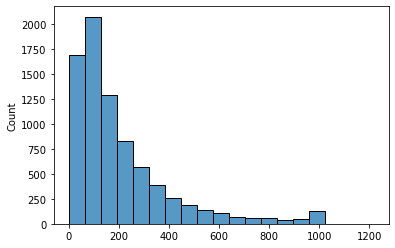

i am 56 years old, i am not your fucking junior pal. what you are saying makes no sense. i don't know what you are basing this on. the cheap black market crap is still coming up from mexican nationals, and the good stuff from bc and humbolt.  the i5 corridor is still just as busy, and they are still making a ton of money. nothing has really changed except that the legal market has made it easy for anyone of legal age to buy it.  and the legal market is controlled by corporate growers with million dollar facilities, or a co-op of smaller growers. the federal government "war on drugs" really has no impact on the legal market in oregon. i don't see any glutton of weed, whatever that means.


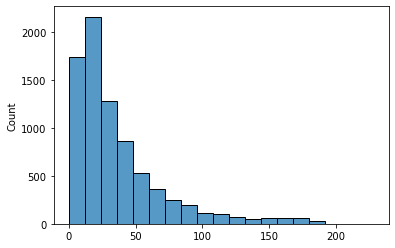

['i', 'am', '56', 'years', 'old,', 'i', 'am', 'not', 'your', 'fucking', 'junior', 'pal.', 'what', 'you', 'are', 'saying', 'makes', 'no', 'sense.', 'i', "don't", 'know', 'what', 'you', 'are', 'basing', 'this', 'on.', 'the', 'cheap', 'black', 'market', 'crap', 'is', 'still', 'coming', 'up', 'from', 'mexican', 'nationals,', 'and', 'the', 'good', 'stuff', 'from', 'bc', 'and', 'humbolt.', 'the', 'i5', 'corridor', 'is', 'still', 'just', 'as', 'busy,', 'and', 'they', 'are', 'still', 'making', 'a', 'ton', 'of', 'money.', 'nothing', 'has', 'really', 'changed', 'except', 'that', 'the', 'legal', 'market', 'has', 'made', 'it', 'easy', 'for', 'anyone', 'of', 'legal', 'age', 'to', 'buy', 'it.', 'and', 'the', 'legal', 'market', 'is', 'controlled', 'by', 'corporate', 'growers', 'with', 'million', 'dollar', 'facilities,', 'or', 'a', 'co-op', 'of', 'smaller', 'growers.', 'the', 'federal', 'government', '"war', 'on', 'drugs"', 'really', 'has', 'no', 'impact', 'on', 'the', 'legal', 'market', 'in', 'oregon

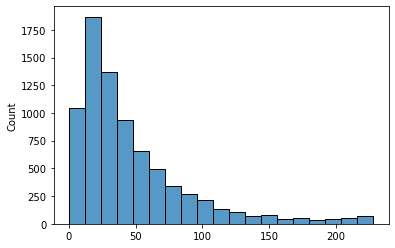

['i', 'Ġam', 'Ġ56', 'Ġyears', 'Ġold', ',', 'Ġi', 'Ġam', 'Ġnot', 'Ġyour', 'Ġfucking', 'Ġjunior', 'Ġpal', '.', 'Ġwhat', 'Ġyou', 'Ġare', 'Ġsaying', 'Ġmakes', 'Ġno', 'Ġsense', '.', 'Ġi', 'Ġdon', "'t", 'Ġknow', 'Ġwhat', 'Ġyou', 'Ġare', 'Ġbas', 'ing', 'Ġthis', 'Ġon', '.', 'Ġthe', 'Ġcheap', 'Ġblack', 'Ġmarket', 'Ġcrap', 'Ġis', 'Ġstill', 'Ġcoming', 'Ġup', 'Ġfrom', 'Ġme', 'x', 'ican', 'Ġnationals', ',', 'Ġand', 'Ġthe', 'Ġgood', 'Ġstuff', 'Ġfrom', 'Ġbc', 'Ġand', 'Ġhum', 'bolt', '.', 'Ġ', 'Ġthe', 'Ġi', '5', 'Ġcorridor', 'Ġis', 'Ġstill', 'Ġjust', 'Ġas', 'Ġbusy', ',', 'Ġand', 'Ġthey', 'Ġare', 'Ġstill', 'Ġmaking', 'Ġa', 'Ġton', 'Ġof', 'Ġmoney', '.', 'Ġnothing', 'Ġhas', 'Ġreally', 'Ġchanged', 'Ġexcept', 'Ġthat', 'Ġthe', 'Ġlegal', 'Ġmarket', 'Ġhas', 'Ġmade', 'Ġit', 'Ġeasy', 'Ġfor', 'Ġanyone', 'Ġof', 'Ġlegal', 'Ġage', 'Ġto', 'Ġbuy', 'Ġit', '.', 'Ġ', 'Ġand', 'Ġthe', 'Ġlegal', 'Ġmarket', 'Ġis', 'Ġcontrolled', 'Ġby', 'Ġcorporate', 'Ġgrowers', 'Ġwith', 'Ġmillion', 'Ġdollar', 'Ġfacilities', ',', 'Ġor', 'Ġa'

In [48]:
sent_list, sent_label, tokens_list = read_data(workDir + trainfile)

In [50]:
tokens_list[1]

['i',
 'Ġam',
 'Ġ56',
 'Ġyears',
 'Ġold',
 ',',
 'Ġi',
 'Ġam',
 'Ġnot',
 'Ġyour',
 'Ġfucking',
 'Ġjunior',
 'Ġpal',
 '.',
 'Ġwhat',
 'Ġyou',
 'Ġare',
 'Ġsaying',
 'Ġmakes',
 'Ġno',
 'Ġsense',
 '.',
 'Ġi',
 'Ġdon',
 "'t",
 'Ġknow',
 'Ġwhat',
 'Ġyou',
 'Ġare',
 'Ġbas',
 'ing',
 'Ġthis',
 'Ġon',
 '.',
 'Ġthe',
 'Ġcheap',
 'Ġblack',
 'Ġmarket',
 'Ġcrap',
 'Ġis',
 'Ġstill',
 'Ġcoming',
 'Ġup',
 'Ġfrom',
 'Ġme',
 'x',
 'ican',
 'Ġnationals',
 ',',
 'Ġand',
 'Ġthe',
 'Ġgood',
 'Ġstuff',
 'Ġfrom',
 'Ġbc',
 'Ġand',
 'Ġhum',
 'bolt',
 '.',
 'Ġ',
 'Ġthe',
 'Ġi',
 '5',
 'Ġcorridor',
 'Ġis',
 'Ġstill',
 'Ġjust',
 'Ġas',
 'Ġbusy',
 ',',
 'Ġand',
 'Ġthey',
 'Ġare',
 'Ġstill',
 'Ġmaking',
 'Ġa',
 'Ġton',
 'Ġof',
 'Ġmoney',
 '.',
 'Ġnothing',
 'Ġhas',
 'Ġreally',
 'Ġchanged',
 'Ġexcept',
 'Ġthat',
 'Ġthe',
 'Ġlegal',
 'Ġmarket',
 'Ġhas',
 'Ġmade',
 'Ġit',
 'Ġeasy',
 'Ġfor',
 'Ġanyone',
 'Ġof',
 'Ġlegal',
 'Ġage',
 'Ġto',
 'Ġbuy',
 'Ġit',
 '.',
 'Ġ',
 'Ġand',
 'Ġthe',
 'Ġlegal',
 'Ġmarket',
 'Ġis',
 'Ġc

In [102]:
def reberta_labeling(tokens_list, sent_label,istrain=True):
    '''
    label the bert tokens according to the ground truth labels
    '''
    if istrain is True:
        index, tokens, labels = [], [], []
        for i in range(7000):
            num = 0
            for j in range(len(tokens_list[i])):

                istoxic = 0
                for k in range(len(tokens_list[i][j])):
                    if num in json.loads(sent_label[i]):
                        istoxic = 1
                    num += 1
                index.append(i)
                tokens.append(tokens_list[i][j])
                if istoxic == 1:
                    labels.append('t')
                else:
                    labels.append('nt')
        result_dict = {'sentence_id':index, 'words':tokens, 'labels':labels}
        result = pd.DataFrame(result_dict)
        result.to_csv('train.csv',index=False)
        
        index, tokens, labels = [], [], []
        for i in range(7000,len(tokens_list)):
            num = 0
            for j in range(len(tokens_list[i])):
                istoxic = 0
                for k in range(len(tokens_list[i][j])):
                    if num in json.loads(sent_label[i]):
                        istoxic = 1
                    num += 1
                index.append(i-7000)
                tokens.append(tokens_list[i][j])
                if istoxic == 1:
                    labels.append('t')
                else:
                    labels.append('nt')
        result_dict = {'sentence_id':index, 'words':tokens, 'labels':labels}
        result = pd.DataFrame(result_dict)
        result.to_csv('dev.csv',index=False)
    else:
        index, tokens, labels = [], [], []
        for i in range(len(tokens_list)):
            num = 0
            for j in range(len(tokens_list[i])):

                istoxic = 0
                for k in range(len(tokens_list[i][j])):
                    if num in json.loads(sent_label[i]):
                        istoxic = 1
                    num += 1
                index.append(i)
                tokens.append(tokens_list[i][j])
                if istoxic == 1:
                    labels.append('t')
                else:
                    labels.append('nt')
        result_dict = {'sentence_id':index, 'words':tokens, 'labels':labels}
        result = pd.DataFrame(result_dict)
        result.to_csv('test.csv',index=False)

In [103]:
reberta_labeling(tokens_list, sent_label)


2000


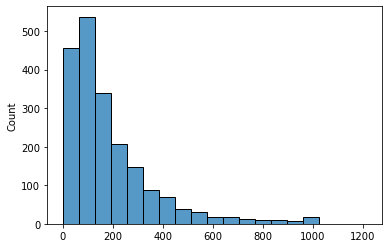

"watch people die from taking away their healthcare"

ding ding ding!  winner of stupid post of the day award!


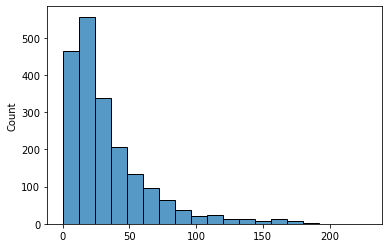

['"watch', 'people', 'die', 'from', 'taking', 'away', 'their', 'healthcare"', 'ding', 'ding', 'ding!', 'winner', 'of', 'stupid', 'post', 'of', 'the', 'day', 'award!']


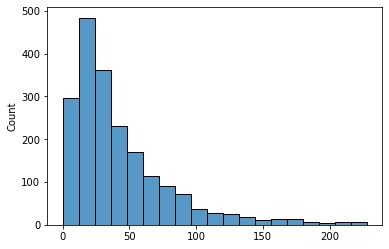

['"', 'watch', 'Ġpeople', 'Ġdie', 'Ġfrom', 'Ġtaking', 'Ġaway', 'Ġtheir', 'Ġhealthcare', '"', 'Ċ', 'Ċ', 'ding', 'Ġding', 'Ġding', '!', 'Ġ', 'Ġwinner', 'Ġof', 'Ġstupid', 'Ġpost', 'Ġof', 'Ġthe', 'Ġday', 'Ġaward', '!']


In [105]:
sent_list_test, sent_label_test, tokens_list_test = read_data(workDir + testfile)
reberta_labeling(tokens_list_test, sent_label_test,istrain=False)

In [106]:
tokens_list_test

[['that',
  "'s",
  'Ġright',
  '.',
  'Ġthey',
  'Ġare',
  'Ġnot',
  'Ġnormal',
  '.',
  'Ġand',
  'Ġi',
  'Ġam',
  'Ġstarting',
  'Ġfrom',
  'Ġthe',
  'Ġpremise',
  'Ġthat',
  'Ġthey',
  'Ġare',
  'Ġabnormal',
  '.',
  'Ġproceed',
  'Ġw',
  'th',
  'Ġthe',
  'Ġtypical',
  'Ġracist',
  ',',
  'Ġbigot',
  ',',
  'Ġsexist',
  'Ġrubbish',
  '.',
  'Ċ',
  'thanks',
  '!'],
 ['"',
  'watch',
  'Ġpeople',
  'Ġdie',
  'Ġfrom',
  'Ġtaking',
  'Ġaway',
  'Ġtheir',
  'Ġhealthcare',
  '"',
  'Ċ',
  'Ċ',
  'ding',
  'Ġding',
  'Ġding',
  '!',
  'Ġ',
  'Ġwinner',
  'Ġof',
  'Ġstupid',
  'Ġpost',
  'Ġof',
  'Ġthe',
  'Ġday',
  'Ġaward',
  '!'],
 ['t',
  'ens',
  'Ġyears',
  'Ġago',
  'Ġi',
  'Ġcontacted',
  'Ġthe',
  'Ġp',
  'dr',
  'Ġand',
  'Ġsuggested',
  'Ġthat',
  'Ġthe',
  'Ġtime',
  'Ġmight',
  'Ġbe',
  'Ġgood',
  'Ġto',
  'Ġwork',
  'Ġwith',
  'Ġal',
  'aska',
  'Ġon',
  'Ġbuilding',
  'Ġa',
  'Ġgas',
  'Ġline',
  '..',
  'Ġal',
  'aska',
  'Ġrejected',
  'Ġthem',
  'Ġwithout',
  'Ġeven',
 